In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters
import matplotlib.patches as patches

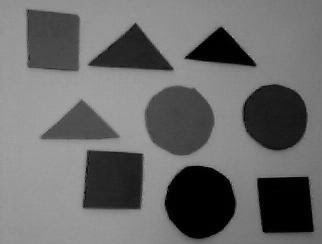

In [2]:
image = Image.open('foto.jpg').convert("L")
# image = Image.open('figuras.jpg').convert("L")
image

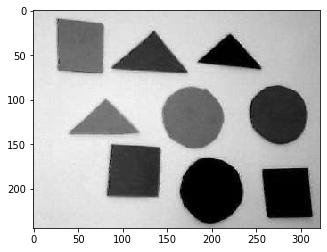

In [3]:
#Converting image into numpy array
AIMG = np.array(image)

plt.imshow(AIMG,cmap='gray')
plt.show()

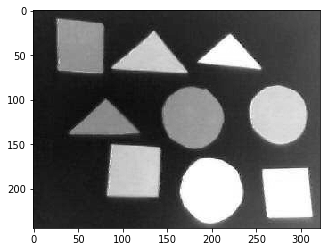

In [4]:
#  Proceso para aplicar los momentos de hu
# Invertir los colores de la imagen 
IAIMG=ski.util.invert(AIMG)
plt.imshow(IAIMG,cmap='gray')
plt.show()

In [56]:
def umbral_image(img):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>160:
                z[i,j]=250
    return z

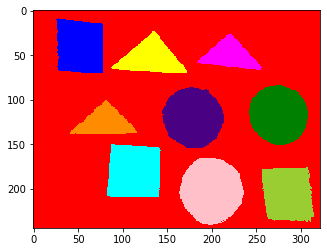

In [57]:
# Binarizar imagen 
CD=umbral_image(IAIMG)
label_image=ski.measure.label(CD)
plt.imshow(ski.color.label2rgb(label_image))
plt.show()

In [58]:
# Calcular las propiedades de la figura
regions = ski.measure.regionprops(label_image)
l = []
# print(len(regions))
for region in regions:
#     print(region.bbox_area)
    if region["bbox_area"] > 2500 and region["bbox_area"] < 10000:
#       print("bbox {}, bbox_area {}".format(region["bbox"], region["bbox_area"]))
        l.append({"bbox": region["bbox"], "bbox_area": region["bbox_area"]})
print(l)
# print(len(l))

[{'bbox': (9, 26, 71, 79), 'bbox_area': 3286}, {'bbox': (23, 88, 71, 173), 'bbox_area': 4080}, {'bbox': (27, 184, 67, 257), 'bbox_area': 2920}, {'bbox': (84, 242, 151, 308), 'bbox_area': 4422}, {'bbox': (86, 145, 155, 214), 'bbox_area': 4761}, {'bbox': (101, 42, 139, 118), 'bbox_area': 2888}, {'bbox': (150, 83, 209, 144), 'bbox_area': 3599}, {'bbox': (166, 164, 241, 237), 'bbox_area': 5475}, {'bbox': (176, 257, 237, 315), 'bbox_area': 3538}]


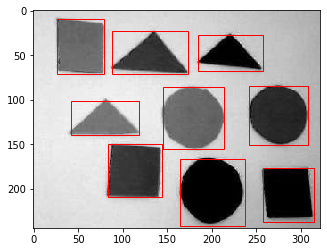

In [59]:
fig,ax = plt.subplots(1)
ax.imshow(AIMG,cmap='gray')
for dic in l:
    minr, minc, maxr, maxc = dic["bbox"]
    rect = patches.Rectangle((minc, minr), maxc - minc, maxr - minr, linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()